In [1]:
import tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

Text(0.5, 1.0, 'Class: 9')

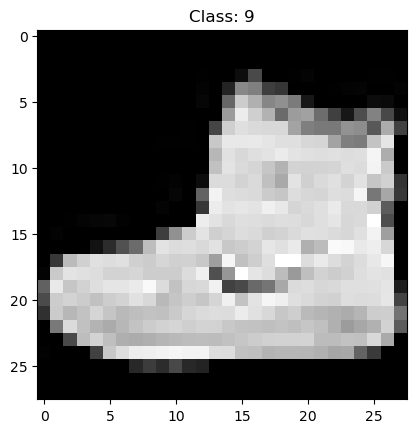

In [5]:
plt.imshow(X_train[0],cmap = 'gray')
plt.title('Class: '+ str(y_train[0]))

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
X_train = X_train.reshape(60000,28*28)

In [8]:
X_test = X_test.reshape(10000,28*28)
X_test.shape

(10000, 784)

In [9]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [10]:
X_train/= 255
X_test/= 255

In [11]:
import keras
y_train = keras.utils.to_categorical(y_train)

In [12]:
y_test = keras.utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
network = Sequential()
network.add(Dense(input_shape = (784,),units = 397,activation = 'relu'))
network.add(Dense(units= 397,activation= 'relu'))
network.add(Dense(units= 10,activation = 'softmax'))

In [14]:
network.compile(loss = 'categorical_crossentropy', optimizer= 'adam',metrics = ['accuracy']) # we should use sparse_categorical_crossentropy

In [15]:
history = network.fit(X_train,y_train,batch_size= 128,epochs = 10)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4860 - accuracy: 0.8259
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3508 - accuracy: 0.8734
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3169 - accuracy: 0.8836
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2940 - accuracy: 0.8900
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2727 - accuracy: 0.8977
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2579 - accuracy: 0.9031
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2487 - accuracy: 0.9073
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2340 - accuracy: 0.9116
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2243 - accuracy: 0.9147
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2140 - accuracy: 0.9182

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

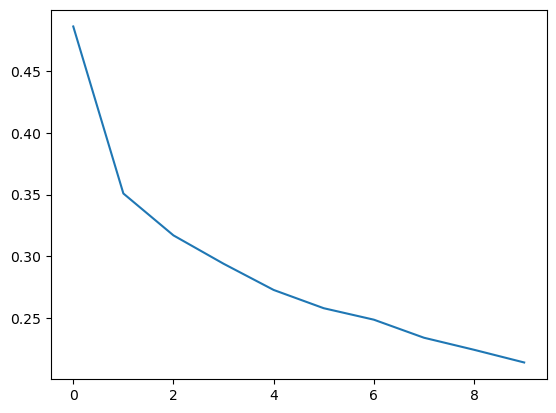

In [17]:
plt.plot(history.history['loss'])

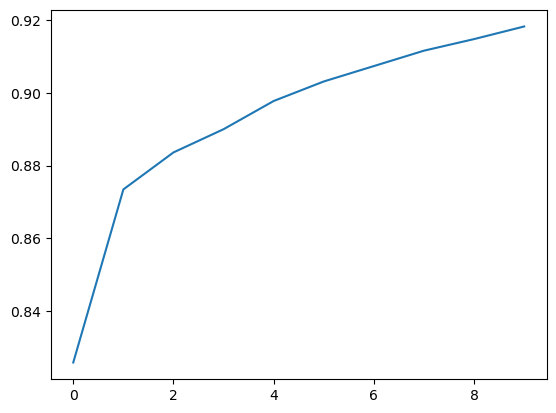

In [18]:
plt.plot(history.history['accuracy'])

In [19]:
accuracy_test = network.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3159 - accuracy: 0.8933


In [20]:
pred = network.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [21]:
pred[0]

array([2.5814113e-06, 1.7497262e-06, 1.5821229e-06, 2.0754955e-07,
       1.8058496e-07, 6.6984212e-05, 3.7398825e-06, 1.7791266e-03,
       8.0343071e-08, 9.9814379e-01], dtype=float32)

In [22]:
np.argmax(pred[0])

9

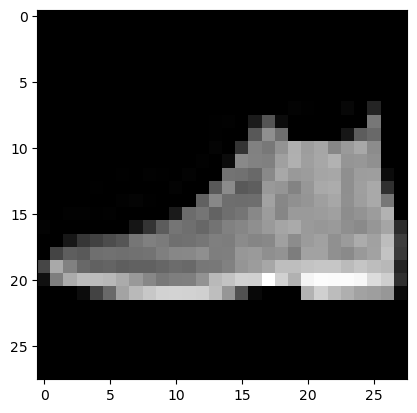

In [23]:
plt.imshow(X_test[0].reshape(28,28),cmap= 'gray')